<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_1_2)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-1.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.2_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,50.722964,84.973363,55.509379,-0.003848,201.201858,201.200731,0.001127
1,0.0,1.0,93.973066,42.815339,67.660225,-0.084276,214.364354,214.449549,-0.085195
2,0.0,2.0,78.739234,39.262261,94.278787,-0.001534,222.278748,222.281805,-0.003057
3,0.0,3.0,63.010702,50.733931,20.492609,0.046389,144.283632,144.228384,0.055248
4,0.0,4.0,79.025929,27.107868,60.971297,-0.119819,176.985276,177.102199,-0.116923
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,36.931197,20.759474,92.612463,-0.099052,160.204082,160.309495,-0.105413
249996,999.0,246.0,22.052363,61.065807,30.610496,-0.098192,123.630474,123.733937,-0.103463
249997,999.0,247.0,70.463439,35.532565,67.681156,-0.000747,183.676413,183.671958,0.004454
249998,999.0,248.0,77.926023,49.415713,81.975657,-0.091291,219.226102,219.316844,-0.090743


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    50.722964  84.973363  55.509379 -0.003848  201.201858   
      1.0    93.973066  42.815339  67.660225 -0.084276  214.364354   
      2.0    78.739234  39.262261  94.278787 -0.001534  222.278748   
      3.0    63.010702  50.733931  20.492609  0.046389  144.283632   
      4.0    79.025929  27.107868  60.971297 -0.119819  176.985276   
...                ...        ...        ...       ...         ...   
999.0 245.0  36.931197  20.759474  92.612463 -0.099052  160.204082   
      246.0  22.052363  61.065807  30.610496 -0.098192  123.630474   
      247.0  70.463439  35.532565  67.681156 -0.000747  183.676413   
      248.0  77.926023  49.415713  81.975657 -0.091291  219.226102   
      249.0  37.128809  67.352469  77.556409  0.036610  192.074297   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    201.200731  0.001127  
      1.0    214.449549 -0.085195  
      2.0    222.281805 -0.003057  
      3.0    144.228384  0.055248  
      4.0    177.102199 -0.116923  
...                 ...       ...  
999.0 245.0  160.309495 -0.105413  
      246.0  123.733937 -0.103463  
      247.0  183.671958  0.004454  
      248.0  219.316844 -0.090743  
      249.0  192.051481  0.022816  

[250000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    50.722964  84.973363  55.509379 -0.003848  201.201858   
      1.0    93.973066  42.815339  67.660225 -0.084276  214.364354   
      2.0    78.739234  39.262261  94.278787 -0.001534  222.278748   
      3.0    63.010702  50.733931  20.492609  0.046389  144.283632   
      4.0    79.025929  27.107868  60.971297 -0.119819  176.985276   
...                ...        ...        ...       ...         ...   
999.0 245.0  36.931197  20.759474  92.612463 -0.099052  160.204082   
      246.0  22.052363  61.065807  30.610496 -0.098192  123.630474   
      247.0  70.463439  35.532565  67.681156 -0.000747  183.676413   
      248.0  77.926023  49.415713  81.975657 -0.091291  219.226102   
      249.0  37.128809  67.352469  77.556409  0.036610  192.074297   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    201.200731  0.001127  
      1.0    214.449549 -0.085195  
      2.0    222.281805 -0.003057  
      3.0    144.228384  0.055248  
      4.0    177.102199 -0.116923  
...                 ...       ...  
999.0 245.0  160.309495 -0.105413  
      246.0  123.733937 -0.103463  
      247.0  183.671958  0.004454  
      248.0  219.316844 -0.090743  
      249.0  192.051481  0.022816  

[250000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,50.722964,84.973363,55.509379,-0.003848,201.201858,201.200731,0.001127
1,0.0,1.0,93.973066,42.815339,67.660225,-0.084276,214.364354,214.449549,-0.085195
2,0.0,2.0,78.739234,39.262261,94.278787,-0.001534,222.278748,222.281805,-0.003057
3,0.0,3.0,63.010702,50.733931,20.492609,0.046389,144.283632,144.228384,0.055248
4,0.0,4.0,79.025929,27.107868,60.971297,-0.119819,176.985276,177.102199,-0.116923
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,36.931197,20.759474,92.612463,-0.099052,160.204082,160.309495,-0.105413
249996,999.0,246.0,22.052363,61.065807,30.610496,-0.098192,123.630474,123.733937,-0.103463
249997,999.0,247.0,70.463439,35.532565,67.681156,-0.000747,183.676413,183.671958,0.004454
249998,999.0,248.0,77.926023,49.415713,81.975657,-0.091291,219.226102,219.316844,-0.090743


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    50.722964  84.973363  55.509379 -0.003848  201.201858   
      1.0    93.973066  42.815339  67.660225 -0.084276  214.364354   
      2.0    78.739234  39.262261  94.278787 -0.001534  222.278748   
      3.0    63.010702  50.733931  20.492609  0.046389  144.283632   
      4.0    79.025929  27.107868  60.971297 -0.119819  176.985276   
...                ...        ...        ...       ...         ...   
999.0 245.0  36.931197  20.759474  92.612463 -0.099052  160.204082   
      246.0  22.052363  61.065807  30.610496 -0.098192  123.630474   
      247.0  70.463439  35.532565  67.681156 -0.000747  183.676413   
      248.0  77.926023  49.415713  81.975657 -0.091291  219.226102   
      249.0  37.128809  67.352469  77.556409  0.036610  192.074297   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    201.200731  0.001127  
      1.0    214.449549 -0.085195  
      2.0    222.281805 -0.003057  
      3.0    144.228384  0.055248  
      4.0    177.102199 -0.116923  
...                 ...       ...  
999.0 245.0  160.309495 -0.105413  
      246.0  123.733937 -0.103463  
      247.0  183.671958  0.004454  
      248.0  219.316844 -0.090743  
      249.0  192.051481  0.022816  

[250000 rows x 7 columns]

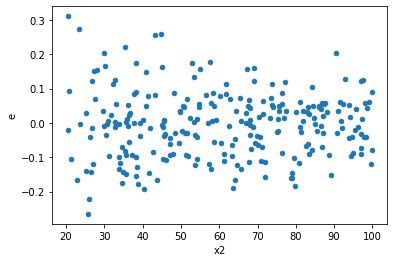

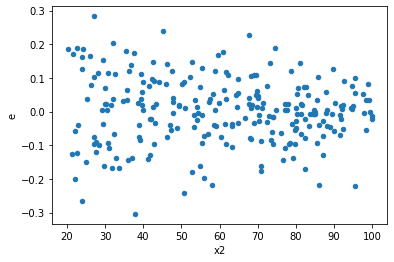

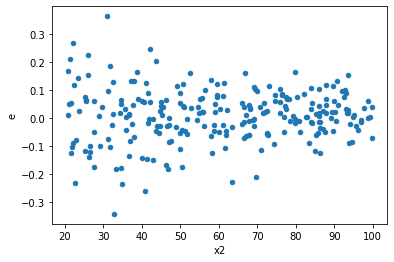

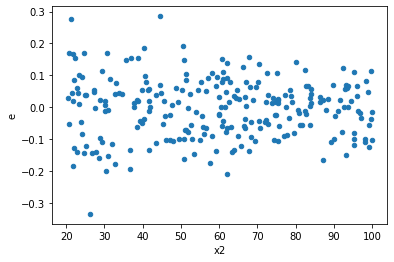

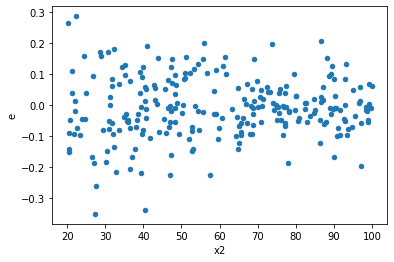

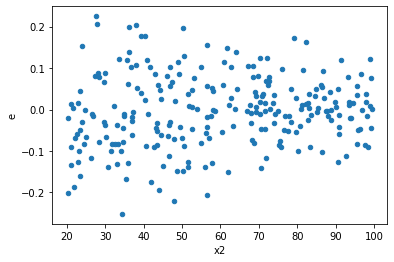

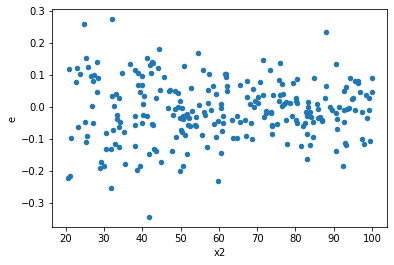

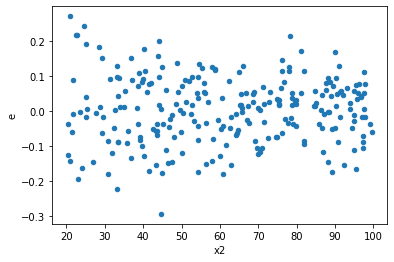

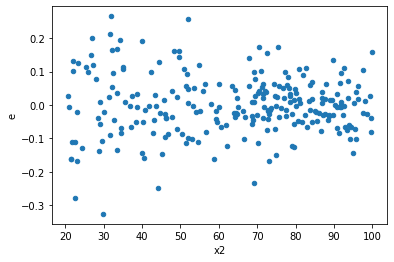

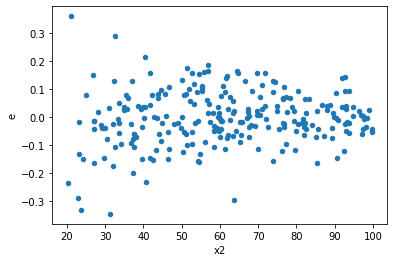

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,108.0,136.0,0.8754913916271141,1.3509057374918003,0.008106401774325131,0.009933130422733825,1.2253439564511064,0.2614451566562297,0.8692774216718852,0.13072257832811485,Reject001=1 : Homoscedasticity
1.0,122.0,122.0,1.0585887389090707,1.281892915255916,0.008676956876303859,0.010507318977507509,1.2109451651421983,0.2918454013233789,0.8540772993383106,0.14592270066168944,Reject001=1 : Homoscedasticity
3.0,110.0,134.0,0.7703167096617294,1.3032233309594978,0.007002879178742994,0.009725547245966401,1.3887926662347645,0.06983321120121921,0.9650833943993904,0.03491660560060961,Reject001=1 : Homoscedasticity
5.0,127.0,117.0,0.7328932126091758,1.0723292029376832,0.005770812697710046,0.009165206862715242,1.5882003701752696,0.011540888512113323,0.9942295557439433,0.0057704442560566616,Reject001=1 : Homoscedasticity
12.0,130.0,114.0,1.0790635720324342,1.3908986606407017,0.00830048901563411,0.01220086544421668,1.4698971857243768,0.03580214684276206,0.982098926578619,0.01790107342138103,Reject001=1 : Homoscedasticity
13.0,121.0,123.0,0.9549536403759995,1.2992076137217121,0.007892178846082641,0.010562663526192782,1.3383710293686086,0.10859037794736848,0.9457048110263158,0.05429518897368424,Reject001=1 : Homoscedasticity
16.0,125.0,119.0,0.7555434360699668,1.612418439780557,0.006044347488559734,0.013549734788071907,2.2417200225033027,1.2191557412277731e-05,0.9999939042212939,6.095778706138866e-06,Reject001=0 : Heteroscedasticity
17.0,127.0,117.0,0.7208705926800706,1.5710464598219176,0.005676146399055674,0.01342774751984545,2.3656450302408323,3.4366348158343385e-06,0.9999982816825921,1.7183174079171692e-06,Reject001=0 : Heteroscedasticity
19.0,128.0,116.0,0.8425622155047164,1.6697038178099064,0.006582517308630597,0.014393998429395745,2.186701189607691,2.3914053628670828e-05,0.9999880429731857,1.1957026814335414e-05,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,108.0,136.0,0.8754913916271141,1.3509057374918003,0.008106401774325131,0.009933130422733825,1.2253439564511064,0.2614451566562297,Reject001=1 : Homoscedasticity
1.0,122.0,122.0,1.0585887389090707,1.281892915255916,0.008676956876303859,0.010507318977507509,1.2109451651421983,0.2918454013233789,Reject001=1 : Homoscedasticity
2.0,123.0,121.0,1.3850080784656442,0.7353657618277291,0.011260228280208489,0.006077402990311811,0.5397228936285193,0.0007362521273491176,Reject001=0 : Heteroscedasticity
3.0,110.0,134.0,0.7703167096617294,1.3032233309594978,0.007002879178742994,0.009725547245966401,1.3887926662347645,0.06983321120121921,Reject001=1 : Homoscedasticity
4.0,113.0,131.0,1.4693464693479303,0.8507878948601239,0.013003066100424163,0.0064945640829017085,0.4994640519969251,0.0001817969629846349,Reject001=0 : Heteroscedasticity
5.0,127.0,117.0,0.7328932126091758,1.0723292029376832,0.005770812697710046,0.009165206862715242,1.5882003701752696,0.011540888512113323,Reject001=1 : Homoscedasticity
6.0,125.0,119.0,1.4116213998082532,0.7146788203174187,0.011292971198466025,0.006005704372415283,0.5318090577642725,0.0005376695873937448,Reject001=0 : Heteroscedasticity
7.0,127.0,117.0,1.4134055464169826,0.7560836336143143,0.011129177530842383,0.006462253278754823,0.5806586570162914,0.002801398148121814,Reject001=0 : Heteroscedasticity
8.0,132.0,112.0,1.2369477638325244,0.7045333350561647,0.00937081639267064,0.006290476205858613,0.6712836899438872,0.02788459348144282,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    560
Reject001=1 : Homoscedasticity      440
Name: Result_test, dtype: int64